# En este notebook implementaremos el ELBOW-method

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

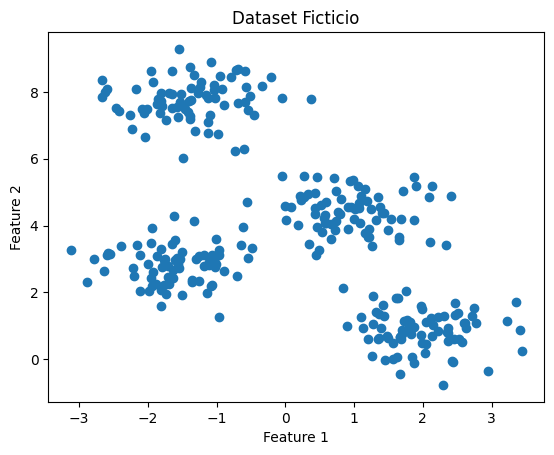

In [2]:
# Creamos 4 clusters
# Creamos dataset ficticio con 300 muestras, desviación de 0.6 y random_state = 0
X, y = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)

# Ploteamos dataset
plt.scatter(X[:, 0], X[:, 1])
plt.title('Dataset Ficticio')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

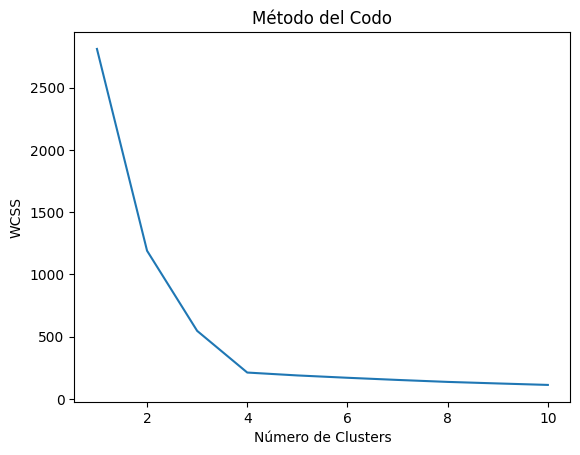

El codo se encuentra en k=4, lo cual tiene sentido dado que sabemos que generamos 4 clusters.


In [3]:
# Lista vacía donde guardaremos la pérdida en cada iteración
wcss = []
# Tarea: entrenamos kmeans con inicialización 'k-means++' y random_state=0
# El bucle tiene 3 pasos:
#   1. La inicialización del modelo
#   2. El entrenamiento
#   3. Añadir la WCSS a la lista 'wcss'. Hay un atributo del modelo que da ese valor
for i in range(1, 11):
    # Paso 1: Inicialización del modelo
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=0)
    # Paso 2: Entrenamiento
    kmeans.fit(X)
    # Paso 3: Añadir la WCSS a la lista 'wcss'
    wcss.append(kmeans.inertia_)

# Ploteamos la gráfica del método del codo
plt.plot(range(1, 11), wcss)
plt.title('Método del Codo')
plt.xlabel('Número de Clusters')
plt.ylabel('WCSS')
plt.show()

¿Tiene sentido el elbow?

El codo es el punto donde la curva comienza a disminuir más lentamente.
Aquí, parece ser en k=4.

El codo se encuentra en k=4, lo cual tiene sentido dado que sabemos que generamos 4 clusters.

# ¿Tiene sentido el elbow?

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


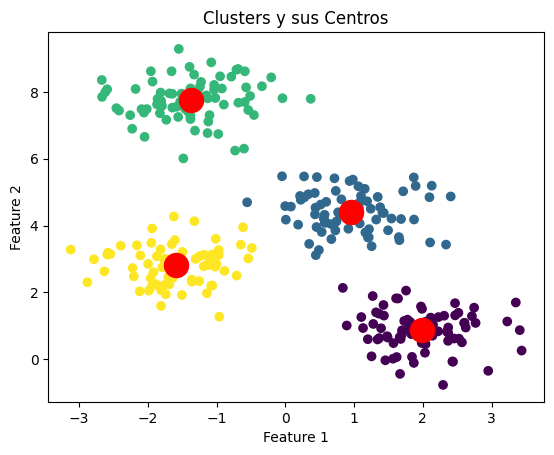

In [4]:
# Tarea: una vez tenemos el número de clusters decidido, lo entrenamos
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=0)
kmeans.fit(X)

# Ploteamos los puntos y los centros
plt.scatter(X[:, 0], X[:, 1], c=kmeans.labels_, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], s=300, c='red')
plt.title('Clusters y sus Centros')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()


In [5]:
# Tarea: obtenemos la media del silhouette score de todas las muestras
silhouette = silhouette_score(X, kmeans.labels_)
print("Silhouette Score = {:.3f}".format(silhouette))

Silhouette Score = 0.682


In [6]:
# Tarea/Pregunta: ¿Cómo sería si queremos obtener el valor silhouette por muestra?
# Podemos obtener el valor silhouette para cada muestra usando la función silhouette_samples
from sklearn.metrics import silhouette_samples
silhouette_values = silhouette_samples(X, kmeans.labels_)

# Mostrar los primeros 10 valores de silhouette para ver un ejemplo
print("Valores de Silhouette para las primeras 10 muestras:", silhouette_values[:10])

Valores de Silhouette para las primeras 10 muestras: [0.23097362 0.77766385 0.71784904 0.78097006 0.46667168 0.64793126
 0.64135581 0.74213088 0.64133793 0.71367736]
